# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [26]:
cities

['busselton',
 'ushuaia',
 'vila velha',
 'hervey bay',
 'ancud',
 'cansancao',
 'klaksvik',
 'mar del plata',
 'lyuban',
 'tsihombe',
 'castro',
 'sumbawa',
 'yellowknife',
 'punta arenas',
 'norman wells',
 'victoria',
 'bluff',
 'stornoway',
 'luderitz',
 'konya',
 'mason city',
 'basco',
 'cape town',
 'inirida',
 'chokurdakh',
 'jhelum',
 'lukovetskiy',
 'mataura',
 'jamestown',
 'deputatskiy',
 'clyde river',
 'rikitea',
 'port hardy',
 'caravelas',
 'puerto ayora',
 'mlimba',
 'ekhabi',
 'albany',
 'arlit',
 'torbay',
 'lagoa',
 'hermanus',
 'atuona',
 'mys shmidta',
 'north platte',
 'puerto leguizamo',
 'juruti',
 'sur',
 'dunedin',
 'erenhot',
 'san patricio',
 'mahebourg',
 'ozinki',
 'artyk',
 'naze',
 'kapaa',
 'zhigansk',
 'daye',
 'saldanha',
 'amahai',
 'mugur-aksy',
 'poya',
 'yulara',
 'tumannyy',
 'port alfred',
 'rokytne',
 'saskylakh',
 'bredasdorp',
 'balkanabat',
 'butaritari',
 'nikolskoye',
 'san carlos',
 'port elizabeth',
 'avarua',
 'roccastrada',
 'aksu',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:
# Create Data Frame to hold api responses
column_names = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
cities_df = pd.DataFrame(columns=column_names)

# Index
i = 0

# Log of API calls
print("Beginning Data Retrieval")
print("-------------------------------")

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    params = {"q": city, "units": "imperial", "appid": api_key}
    
    response = requests.get(url, params=params)
    weather_data = response.json()
    status_code = weather_data["cod"]
    
    if status_code == '404':
        print("City Not Found...Skipping")
    else:
        # Save json values to data frame
        cities_df.set_value(i, "City", weather_data["name"])
        cities_df.set_value(i, "Cloudiness", weather_data['clouds']['all'])
        cities_df.set_value(i, "Country", weather_data["sys"]["country"])
        cities_df.set_value(i, "Date", weather_data["dt"])
        cities_df.set_value(i, "Humidity", weather_data['main']['humidity'])
        cities_df.set_value(i, "Lat", weather_data["coord"]["lat"])
        cities_df.set_value(i, "Lng", weather_data["coord"]["lon"])
        cities_df.set_value(i, "Max Temp", weather_data['main']['temp'])
        cities_df.set_value(i, "Wind Speed", weather_data['wind']['speed'])
        
        # Print Log
        print(f"Processing Record {i + 1} of Set 1 | {city}")
        #print(response.url)
    
    i += 1
    
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vila velha


/Users/abeljrenteria/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abeljrenteria/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abeljrenteria/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abeljrenteria/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abeljrenteria/miniconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launch

Processing Record 4 of Set 1 | hervey bay
Processing Record 5 of Set 1 | ancud
City Not Found...Skipping
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | lyuban
City Not Found...Skipping
Processing Record 11 of Set 1 | castro
City Not Found...Skipping
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | bluff
City Not Found...Skipping
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | konya
Processing Record 21 of Set 1 | mason city
Processing Record 22 of Set 1 | basco
Processing Record 23 of Set 1 | cape town
Processing Record 24 of Set 1 | inirida
Processing Record 25 of Set 1 | chokurdakh
Processing Record 26 of Set 1 | jhelum
Processing Record 27 of Set 1 | lukovetskiy
Processing Record 28 of Set 1 | mataura
Processing Record 29 of Set 1 | ja

Processing Record 212 of Set 1 | kaitangata
Processing Record 213 of Set 1 | filingue
Processing Record 214 of Set 1 | sosnovoborsk
Processing Record 215 of Set 1 | anupgarh
Processing Record 216 of Set 1 | mahibadhoo
Processing Record 217 of Set 1 | marawi
Processing Record 218 of Set 1 | longyearbyen
Processing Record 219 of Set 1 | saint-joseph
Processing Record 220 of Set 1 | savinka
Processing Record 221 of Set 1 | havelock
Processing Record 222 of Set 1 | ballina
Processing Record 223 of Set 1 | qaanaaq
Processing Record 224 of Set 1 | port-cartier
Processing Record 225 of Set 1 | kununurra
City Not Found...Skipping
Processing Record 227 of Set 1 | rodeo
City Not Found...Skipping
Processing Record 229 of Set 1 | constitucion
Processing Record 230 of Set 1 | punta
Processing Record 231 of Set 1 | north bend
Processing Record 232 of Set 1 | salalah
Processing Record 233 of Set 1 | half moon bay
Processing Record 234 of Set 1 | anadyr
Processing Record 235 of Set 1 | cairns
Processi

Processing Record 413 of Set 1 | teguldet
Processing Record 414 of Set 1 | camocim
Processing Record 415 of Set 1 | laramie
Processing Record 416 of Set 1 | prince rupert
Processing Record 417 of Set 1 | port-gentil
Processing Record 418 of Set 1 | constantine
City Not Found...Skipping
Processing Record 420 of Set 1 | boditi
Processing Record 421 of Set 1 | grand gaube
Processing Record 422 of Set 1 | la asuncion
Processing Record 423 of Set 1 | baruun-urt
Processing Record 424 of Set 1 | norsup
Processing Record 425 of Set 1 | vestmanna
Processing Record 426 of Set 1 | newport
Processing Record 427 of Set 1 | chalus
Processing Record 428 of Set 1 | ola
Processing Record 429 of Set 1 | tanhacu
Processing Record 430 of Set 1 | kjollefjord
Processing Record 431 of Set 1 | bathsheba
Processing Record 432 of Set 1 | craig
Processing Record 433 of Set 1 | ashtabula
Processing Record 434 of Set 1 | talnakh
Processing Record 435 of Set 1 | kapit
City Not Found...Skipping
Processing Record 437

Processing Record 616 of Set 1 | aleksandrov gay
City Not Found...Skipping
Processing Record 618 of Set 1 | nha trang
Processing Record 619 of Set 1 | phatthalung
Processing Record 620 of Set 1 | micheweni
Processing Record 621 of Set 1 | touros
Processing Record 622 of Set 1 | tabou
Processing Record 623 of Set 1 | mwinilunga
Processing Record 624 of Set 1 | acapulco
Processing Record 625 of Set 1 | axim
Processing Record 626 of Set 1 | ust-nera
City Not Found...Skipping
Processing Record 628 of Set 1 | champerico
Processing Record 629 of Set 1 | mareeba
Processing Record 630 of Set 1 | casablanca
Processing Record 631 of Set 1 | hualmay
Processing Record 632 of Set 1 | sunggal
City Not Found...Skipping
Processing Record 634 of Set 1 | saint-georges
Processing Record 635 of Set 1 | leh
City Not Found...Skipping
Processing Record 637 of Set 1 | bereda
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
cities_df.to_csv(r'Output\CityWeather.csv')

cities_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [62]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,4,AU,1567726017,68,-33.64,115.35,34.66,12.55
1,Ushuaia,20,AR,1567725730,69,-54.81,-68.31,37.4,17.22
2,Vila Velha,40,BR,1567725829,78,-3.71,-38.6,79.12,9.17
3,Hervey Bay,0,AU,1567725902,82,-25.3,152.85,72.77,9.17
4,Ancud,20,CL,1567726018,70,-41.87,-73.83,46.4,4.7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

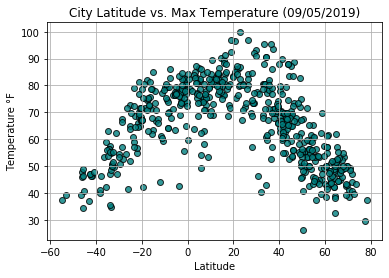

In [68]:
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", 
            linewidths=1, facecolors="teal", edgecolors="black", alpha=0.8)

plt.title(f"City Latitude vs. Max Temperature ({dt.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.grid(True)
          
plt.savefig('Output/Lat_Temp_Plot.png')

#### Latitude vs. Humidity Plot

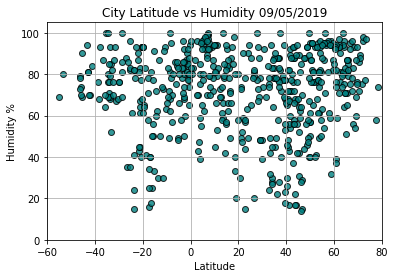

In [69]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", 
            linewidths=1, facecolors="teal", edgecolors="black", alpha=0.8)

plt.title(f"City Latitude vs Humidity {dt.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.axis([-60, 80, 0, 105])

plt.savefig('output/Humidity_Lat_Plot.png')

#### Latitude vs. Cloudiness Plot

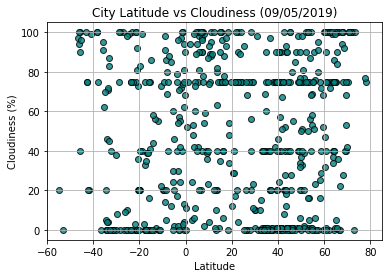

In [70]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", 
            linewidths=1, facecolors="teal", edgecolors="black", alpha=0.8)

plt.title(f"City Latitude vs Cloudiness ({dt.now().strftime ('%m/%d/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.axis([-60, 85, -5, 105])
plt.grid(True)
          
plt.savefig('output/Cloudy_Lat_Plot.png')

#### Latitude vs. Wind Speed Plot

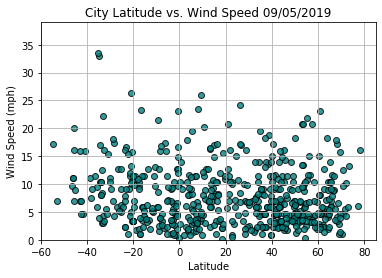

In [71]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o",
            linewidths=1, facecolors="teal", edgecolors="black", alpha=0.8)

plt.title(f"City Latitude vs. Wind Speed {dt.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.axis([-60, 85, 0, 39])
plt.grid(True)

plt.savefig('output/WindSpeed_Lat_Plot.png')